In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import trackpy.predict
from scipy.misc import imsave
from scipy.misc import imread
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
shot = 232
picL = 18333
picR = 18158
FrameL = pims.ImageSequence('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/invframe/frame_*.tif'.format(shot,shot,picL))
FrameR = pims.ImageSequence('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/invframe/frame_*.tif'.format(shot,shot,picR))
#FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picL))
#FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picR))
v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))

In [2]:
###################################
#Locate Features; single frame test
###################################
#init_index = 100
#f = tp.locate(FrameL[init_index], 3, minmass=5) 
#Show points located. It will be better to have more points rather than missing points.
#plt.figure(figsize=[12,12])  # make a new figure
#tp.annotate(f, FrameL[init_index]);

In [3]:
#Show 'mass' distribution
#fig, ax = plt.subplots()
#ax.hist(f['mass'], bins=20)
# Optionally, label the axes.
#ax.set(xlabel='mass', ylabel='count');
#plt.show()

In [4]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
pred = trackpy.predict.NearestVelocityPredict()
#pred = trackpy.predict.ChannelPredict(0.5, 'x', minsamples=3)
fR = tp.batch(FrameR, 3, minmass=5);
tR = pred.link_df(fR, 3, memory=11,  diagnostics=True)
tR.to_csv('./Data/Shot{}/trackR_frame_inv.csv'.format(shot))

Frame 1079: 3 trajectories present


In [5]:
#tR = pd.read_csv('./Data/Shot{}/trackR_frame_inv.csv'.formate(shot))
#tR.head()

In [6]:
#plt.figure(figsize=[12,12])
#tp.plot_traj(tR);

In [7]:
#plt.figure(figsize=[12,12])
#plt.imshow(v0R+bk0R)
#plt.scatter(tR['x'],tR['y'],s=0.3,c='g')
#plt.scatter(tR['x'],tR['y'],s=0.3,c=tR['mass'])
#plt.show()

In [8]:
# Remove tracks too few points (less than 500)
tR1 = tp.filter_stubs(tR,200)
#plt.figure(figsize=[12,12])
#tp.plot_traj(tR1);

In [9]:
#plt.figure(figsize=[12,12])
#plt.imshow(v0R)
#plt.scatter(tR1['x'],tR1['y'],s=0.3,c=tR1['mass'])
#plt.scatter(tR1['x'],tR1['y'],s=0.3,c='r')
#plt.show()

In [10]:
tR2 = tR1
range_limit = 10
Range = {}
for ii in tR2['particle'].unique():
    Track = tR2[tR2['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    ra = math.sqrt((xmax-xmin)*(xmax-xmin)+(ymax-ymin)*(ymax-ymin))
    Range[ii] = ra

In [11]:
RANGE = []
for ii in range(len(tR2)):
    RANGE.append(Range[tR2['particle'].iloc[ii]])
    #print(ii,Range[tR2['particle'].iloc[ii]])

In [12]:
tR2['range'] = RANGE

In [13]:
#tR2.head()

In [14]:
tR3 = tR2[tR2['range']>20]
tR3.to_csv('./Data/Shot{}/trackR3_frame_inv.csv'.format(shot))

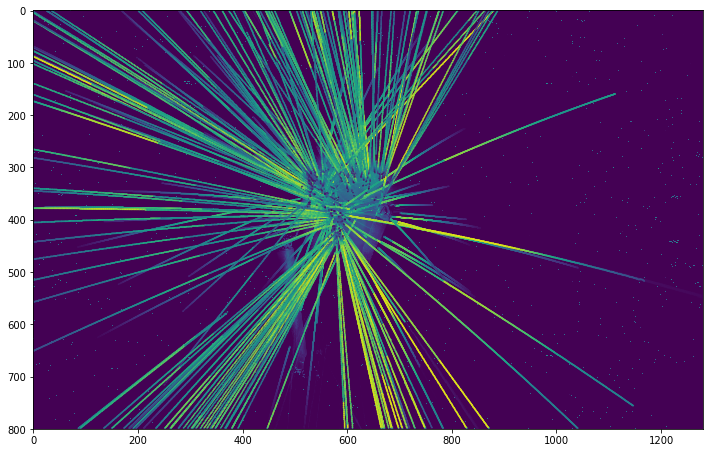

In [15]:
plt.figure(figsize=[12,12])
plt.imshow(v0R+bk0R)
plt.scatter(tR3['x'],tR3['y'],s=0.3,c=tR3['mass'])
#plt.scatter(tR3['x'],tR3['y'],s=0.1,c='g')
plt.savefig('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/sumTrackR.tif'.format(shot,shot,picR))
plt.show()

In [16]:
'''
for ii in tR3['particle'].unique():
#for ii in range(3,4):  
    #print(ii)
    Track = tR3[tR3['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    plt.figure(figsize=[12,12])
    plt.imshow(v0R)
    plt.scatter(Track['x'],Track['y'],s=0.7,c=Track['mass'])
    plt.ylim(ymin-10,ymax+10)
    plt.xlim(xmin-10,xmax+10)
    plt.savefig("./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/trackR_framebk_{}.tif".format(shot,shot,picR,int(ii)))
'''

'\nfor ii in tR3[\'particle\'].unique():\n#for ii in range(3,4):  \n    #print(ii)\n    Track = tR3[tR3[\'particle\']==ii]\n    xmax = np.max(Track[\'x\'])\n    xmin = np.min(Track[\'x\'])\n    ymax = np.max(Track[\'y\'])\n    ymin = np.min(Track[\'y\'])\n    plt.figure(figsize=[12,12])\n    plt.imshow(v0R)\n    plt.scatter(Track[\'x\'],Track[\'y\'],s=0.7,c=Track[\'mass\'])\n    plt.ylim(ymin-10,ymax+10)\n    plt.xlim(xmin-10,xmax+10)\n    plt.savefig("./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/trackR_framebk_{}.tif".format(shot,shot,picR,int(ii)))\n'

In [17]:
#plt.figure(figsize=[12,12])
#tp.plot_traj(tR3);

In [3]:
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))
tR4=pd.read_csv('./Data/Shot{}/trackR3_frame_inv.csv'.format(shot))

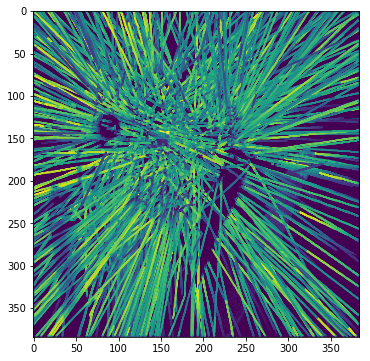

In [4]:
plt.figure(figsize=[6,6])
plt.imshow(bk0L)
plt.scatter(tR4['x'],tR4['y'],s=0.3,c=tR4['mass'])
plt.savefig('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/sumTrackR{}.tif'.format(shot,shot,picR,shot))
plt.show()